Purpose: This Notebook aims to describe what frequentist statistics are and the assumptions made in using them. You may also consider Google Colab as some notebooks may be written in R, and I have found R is difficult to get working properly in Jupyter. 

These documents should be viewed as crash courses to statistics (mostly in Python). They were made with the intention for the written sections to summarize the concept, videos and readings to provide supplementary material, and hopes that you will get the broad concepts. It is encouraged to watch videos on x2 speed and focus on part of the document not labeled as "Advanced" or "Bonus."

<b> Introduction </b>

Frequentist statistics try to describe a population using probabilities and sample data. A sample is a small group of experimental units (people, numbers, etc) taken from a population. A population is the greater group we want to make inferences about. Population data often cannot be gathered due to time and money, and therefore we draw conclusions from a sample.

Video: https://www.youtube.com/watch?v=vikkiwjQqfU&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=6

It is assumed that by taking a sample of Observed Scores, we can get close to the True Score we are trying to infer. However, we will not be exact because of error (Charles Spearman's True Score Model: T=O+E). More on error later. This is done by taking a measure of central tendency. It is also assumed that the data sample and inferred population are normally distributed. This sounds very technical, but all it means is, the average is the most common occurrence, and it is normal for data to be somewhere near the mean. For example, most water drinkers have 5 cups, but some people have less and some people have more.

This guide to statistics has a few data sets attached. Use these or import your own data sets from Kaggle, Yahoo Finance Historical, CDC, WHO, Earth Data by NASA, Data.Gov, or Google Dataset Search. For this notebook, I use the data from the Titanic Dataset of Kaggle. The data is arbitrary, and you should focus on the tools operating on the data. It is encouraged to insert your own data, and familiarize yourself accordingly. 

Statistical tests should be used with “discretion and understanding, and not as instruments which themselves give the final verdict.” – Neyman and Pearson, 1928, p. 232

In [8]:
import pandas as pd #Here I am importing Pandas, a library for manipulating data and doing analysis.

df = pd.read_csv("data/titanic_testdata.csv") #Here I import the data from a local file /data/*file.csv
dfFull = pd.read_csv("data/titanic_testdata.csv") #Here I create a backup of the full dataframe.
print(df) #here I print the data, you can see some stuff but I am mostly confirming the data imported.

     PassengerId  Pclass                                               Name  \
0           1158       1              Chisholm, Mr. Roderick Robert Crispin   
1           1264       1                            Ismay, Mr. Joseph Bruce   
2            913       3                          Olsen, Master. Artur Karl   
3           1008       3                                   Thomas, Mr. John   
4           1025       3                              Thomas, Mr. Charles P   
..           ...     ...                                                ...   
413         1034       1                         Ryerson, Mr. Arthur Larned   
414          945       1                         Fortune, Miss. Ethel Flora   
415          961       1                Fortune, Mrs. Mark (Mary McDougald)   
416         1235       1  Cardeza, Mrs. James Warburton Martinez (Charlo...   
417         1044       3                                 Storey, Mr. Thomas   

        Sex   Age  SibSp  Parch    Ticket      Fare

For convenience, I am going to subset the data for 1/1/1995-11/4/2020. This will give us a nice sample spanning several presidencies, COVID, the 2008 recession, and more.

In [10]:
df = df.loc[df['Fare'] != 0] #Here I subset to contain only rows that contain data
df = df["Fare"] #Here I strip the data that is not part of the "Fare" set
series = df #Here I am making a clone for series data type. 
print(df)

2        3.1708
3        6.4375
4        6.4375
5        6.4958
6        6.9500
         ...   
413    262.3750
414    263.0000
415    263.0000
416    512.3292
417     35.6000
Name: Fare, Length: 416, dtype: float64


In [53]:
df = df.to_frame() #Run this to convert the df_close to a data frame so we can use the following functions.

<b> Central Tendency </b>

Now we will check out some central tendency. The general idea is that if you collect enough samples and center them, the observed center will be closer to the true center as samples increase. This concept is called "regressing to the mean" and is the staple of the Central Limit theorem. 

Video: https://www.youtube.com/watch?v=SzZ6GpcfoQY&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=7

In [54]:
print(df.mean(numeric_only=True)) 

Fare    35.798408
dtype: float64


35.8 is the average of this data. This would be interesting if the data is in fact normally distributed. However, there is something here to consider in the context of the data being represented. Consider if this was stock data based on time-series. A normal distribution typically represents data collected at one point in time. I will move on for now, but the key point here is this mean represents a context of the sample, and does not represent True Values. In stocks, this is mostly confounded by inflation. The main take-away of these code chunks is we can calculate a mean.

In this example, we have the population of Fare data, so our observed mean is the true mean (greek mew). In reality, we do not have the population data, so we estimate using an estimated mean. This is commonly known as x-bar. 

Advanced: Later, we can use stock data and control for inflation by multiplying every year by its inflation factor to modern day, or we could treat it as a covariate in an ANCOVA.

"Science does not promise absolute truth, nor does it consider that such a thing necessarily exists." -Isaac Asimov

In [55]:
print(df.median(numeric_only=True)) 
#Median is a good measure of central tendency when there are major outliers skewing the data. 
#This is the middle numbers

Fare    14.45625
dtype: float64


In [56]:
print(df.mode(numeric_only=True))
#Mode is generally more appropriate for non-quantitative data, like group numbers or catagories.
#It shows the most commonly occurring value.
#The mode has issues where it does not consider all data points, and it is sensitive to significant digits.

   Fare
0  7.75


<b> Normality (Advanced) </b>

Now I want to address data that meets an assumption of "normality." Many statistical analyses assume the data is normally distributed around the mean. This can be visualized in a normal distribution (you may also see guassian distribution, standard distribution, normal curve, standard curve, or bell-shaped curve). There are many types of distributions, for example, the data shown in this notebook by default is probably an Exponential Distribution. I expect the importance of distributions is important in the context of the discipline, but since I work in human behavior research, I always use the standard distribution. 

However, I mentioned before, according to the Central Limit theorem, most things are normally distributed around the population mean. 

I am giving up trying to get df.hist() to work. This would have been a visual test of a normal distribution. Another qualitative method is using a Q-Q plot. In a Q-Q plot, you check if the plots are aligned along a straight diagnol line. In leiu, I am going to do two quantitative tests of normality.

Here is the code for RStudio, I managed to get that to work in 12 seconds. Ideally, the distribution would be normal, that is, the largest bar would be the mean, and data would progressively fall to either side. In this histogram, we see a large skew to one side. The further the data falls way, the wider the distribution, and thus the greater the SD. 

In [63]:
#hist(Titanic_TestData$Fare)
#Qqnorm(Titanic_TestData$Fare, pch = 1, frame = FALSE)

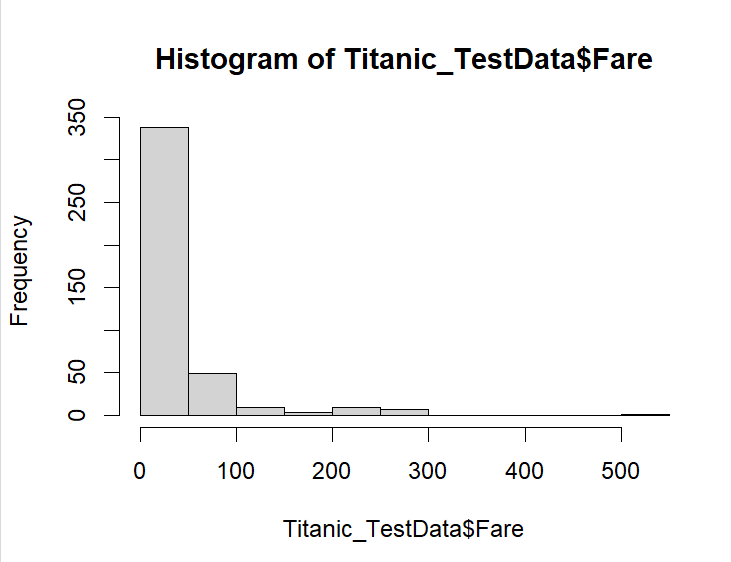

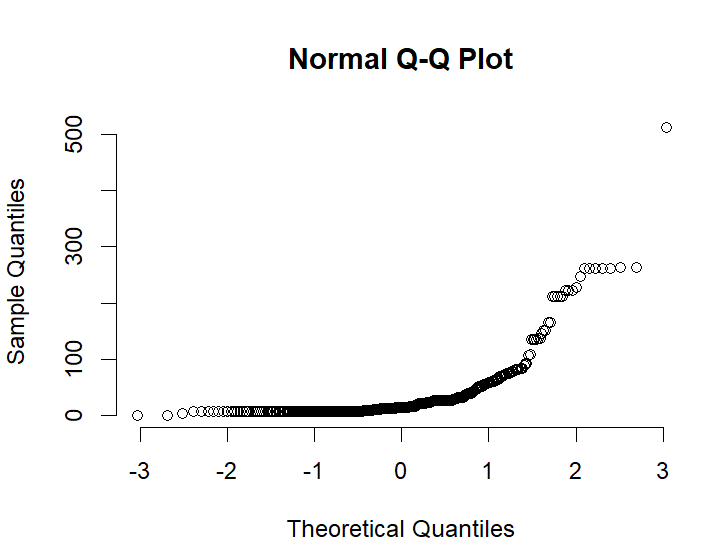

Video (Optional Preliminary): https://www.youtube.com/watch?v=oI3hZJqXJuc&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=2

Video (Also optional): https://www.youtube.com/watch?v=qBigTkBLU6g&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9

Video: https://www.youtube.com/watch?v=rzFX5NWojp0&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=3

Video: https://www.youtube.com/watch?v=XLCWeSVzHUU

Video: https://www.youtube.com/watch?v=YAlJCEDH2uY

In [76]:
import numpy as np
import scipy
from scipy.stats import shapiro
#First I will do a Shapiro-Wilkes test of normality.
shapiro(df.Fare)
#Here we find that the p-value is below our threshold, .05 (alpha), which means this is not normal data. 
#However, a p-value is a probability value that our null hypothesis is true.
#If it is less than .05, then we are saying we are okay that an alternative hypothesis might be true
#given that it may be a false claim 5% of the time. 
#Here, we have a p-value less than 1, a pvalue greater than .05
#would suggest the data is normally distributed. This is our null hypothesis. 

ShapiroResult(statistic=0.5384810566902161, pvalue=1.4126596225060555e-31)

In [1]:
from scipy.stats import kstest #Kolmogorov-Smirnov Test
kstest(df.Fare, 'norm')
#If the p-value of the test is greater than α = .05, then the data is assumed to be normally distributed.

NameError: name 'df' is not defined

At this point we have done 4 tests for normality. 3 (2 qual and 1 quant) suggested there was not a normal distribution. The Shapiro-Wilkes and Kolmogorov-Smirnov Test suggested it was not normally distributed. We can tell from the Qualitative tests it is definitely not normal.

In summary, the quantitative tests are great (when they work), but usually are only used to be absolutely sure a qualitative test is normal. So the conventional practice is to use a qualitative test, and if it passes, use a quantitative test.

<b> Error and Variation </b>

Now we need to address this thing mentioned earlier called "error." Error can be caused by bias, confounds, undescribed terms, misunderstandings, and so much more. So we should break down Spearman's model. If we have no error, than True Score is always equal to Observed Score. This obviously is not the case. Consider a student taking a test. In theory, they have worked x amount of hours, achieved y grade on their assignments, and listen z minutes. These variables are arbitrary, but if they are very high, than let's suppose the student should get a 97 on the test. The student takes the test and they get a 100. This is their observed score. The question is now, how could the student have gotten a higher grade than they deserved? Well, maybe the test does not measure the student's ability accurately, maybe the student had a lucky guess, maybe they cheated, maybe the professor left some hint up in the environmnet such as on the board, etc. For now, lets assume the error is in the test design. We need to lessen the error of the test to better measure the students ability.

The main point here is that we need to account for that error to get a more accurate or "true" measure. We need to make sure our measure is valid and reliable. 

Video: https://www.youtube.com/watch?v=vikkiwjQqfU&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=6

"If we are uncritical we shall always find what we want: we shall look for, and find, confirmations, and we shall look away from, and now see,whatever might be dangerous to our... theories..." -Karl Popper

In [59]:
print(series.max(axis=0)) #Here I get the max

512.3292


In [60]:
print(series.min(axis=0)) #Here I get the minimum

3.1708


In [61]:
print(series.max(axis=0) - series.min(axis=0)) 
#This is computing the range. the range is the most basic measure of variability.
#It tells you very little about the data besides there are 3576.44 units of variability between the max and min.

509.15840000000003


So now we need something a little more powerful to determine how much our data varies. Here we will get into Variance, not to be confused with Variation. Variation refers to how much the data varies, and Variance is an analysis to describe variation.

STD Videos

Video: https://www.youtube.com/watch?v=MRqtXL2WX2M

Video: https://www.youtube.com/watch?v=sHRBg6BhKjI&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=43

In [62]:
series.var(axis=0)
#df.var(axis=0) #both data types can use var.
#Variance is a measure of dispersion. It is arbitrary and this can make it hard to interpret.
#In order to interpret it, we use Standard Deviations, in otherwords, we standardize it to the units of the measure. 

#Notice in the variance formula, we square each term to make sure the terms are positive.
#However, now the variance units are squared. The standard deviation formula fixes this. 

3127.042301384134

In [64]:
series.std(axis=0)
#55.9 means that on average, data points are 55.9 units from the mean. This is 1 standard deviation. 
#If you have a mean of 5$, and an sd of 3$ for all the types of toothbrushes, 
#then the data varies little if you think 3$ is not much.
#Because STD is mean based, it is susceptible to outliers and the assumptions of means. 

55.919963352850424

<b> z-scoring </b>

Standard Deviations are very important to statistics. Next, I will describe Z-Scoring. 

Z-Scores tell you how many SD's from the mean a data point lies. We can see how usual or unusual a data point is. Additionally, you can standardize different scales, that is, in the crash course video they compare ACT and SAT scores. You create two normal distributions and calculate a z score for a student. When comparing two students you can compare z scores as common ground between the normal distributions. You could even plot these on a z distribution, or a standard normal distribution. 

Video: https://www.youtube.com/watch?v=uAxyI_XfqXk

Video: https://www.youtube.com/watch?v=5S-Zfa-vOXs

In [72]:
df_zscore = (df - df.mean())/df.std()
df_zscore

#While we coud use a z-score function from SciPy for example, it was easier to just input the formula. 
#Now we have zscores for every value. 

Fare
2   -0.583470
3   -0.525052
4   -0.525052
5   -0.524010
6   -0.515887
..        ...
413  4.051802
414  4.062978
415  4.062978
416  8.521658
417 -0.003548

[416 rows x 1 columns]

In [75]:
df_zscore.loc[5] #we could also use iloc for the implicit location.
#Here we return just item 5.

Fare   -0.52401
Name: 5, dtype: float64

Up until this point, we have observed the way data compares to itself, in terms of a distribution, or where a datum relates to the distribution, in terms of the z-score. Now we will compare two variables using covariation.

<b> Covariation, Pearson's Correlation (r), and RSquared </b>

Does a relationship between variables, such as rat weight and speed, tell us something that only one variable could not tell us? Covariance can determine if there is a positive, negative, or lack of a trend between the data. If we did not determine the relative slope of the trend lines, we would get a float horizontal line, otherwise known as the mean line. Covariation tells us if two variables vary positively, negatively, or if there is no rend.

Video: https://www.youtube.com/watch?v=qtaqvPAeEJY&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=18

In [91]:
#Here I am going to switch data sets because Titanic does not have much for continuous data.
#It also is not cleaned. I quickly built a data set using Excel and Yahoo Finance where I
#appended Google Stock Data onto the Apple Stock Data. 
df2 = pd.read_csv("data/APPL_GOOG_HistoricalStockData.csv") #Here I import the data from a local file /data/*file.csv
df2 = df2[["APPLClose", "GOOGClose"]]
df2.cov()

APPLClose    GOOGClose
APPLClose  2398.672572  1606.857058
GOOGClose  1606.857058  1174.910375

As you can see, these numbers are positive. Which means there is a linear relationship. In other words,
when one goes up, the other goes up. The issue is, how do we interpret this? This leads up to correlation.

Pearson’s Correlation tells us how strongly two variables are correlated, or related to eachother? This is the extent correlation can be interpreted. It does not determine causality, but only the extent to which two variables are related, or not related. Another flaw is that it is susceptible to small samples (as all statistics are, we will discuss power later). It also only uses linear lines. For example, a small slope could have a correlation of 1, and a large slope could have a correlation of 1. 

Video: https://www.youtube.com/watch?v=xZ_z8KWkhXE&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=17

There are many types of correlation. Here we focus on Pearson (parametric, has assumptions), but you should also familiarize yourself with Kendell Rank Correlation (non-parametric, small sample size), Spearman Correlation (non-parametric, large sample size), and Point-Biserial Correlation. Parametric tests have more statistical power (more on this later).

Take a look at this website to see examples of correlations that are clearly not showing causation.
https://www.tylervigen.com/spurious-correlations

Correlation is very powerful and can do cool things. For example, it can quantify unscaled relationships. It can determine how predictable a trend line is (though this will be followed up with RSquared or R^2). The correlation value, otherwise known as "r" or the correlation coefficient, also has a p-value associated with it. You can use this to determine significance. However, we need to use SciPy to get this as pandas does not support it natively.

In [96]:
from scipy.stats import pearsonr
pearsonr(df2['APPLClose'], df2["GOOGClose"])

r_pvalues

#Here we can see that APPL is correlated with GOOG at .957 with a p-value of <.1.
#This is incredibly high but we can be relatively sure this is not caused by error.
#Later we will learn what predicts these values using Regression, this will be in Part 3. 

(0.957170688452597, 0.0)

In [99]:
#Advanced: This will give all p-values in the df.
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return p

r_pvalues(df2)

APPLClose GOOGClose
APPLClose       0.0       0.0
GOOGClose       0.0       0.0

The last step is interpreting r. It is interesting enough that two variables are related at r=.xx. However, it is not clear what this correlation looks at scale. I typically think of r as growing exponentially. For example, a correlation of .71 is twice as good as a correlation of .50. This becomes obvious using R^2.

RSquared quantifies the amount of variation in the data that is explained by the relationship of the two variables. In terms of Spearman's True Score Model, our variables are the observed score, and error is the part that is unaccounted for. Here we will take the correlation between APPLClose and GOOGClose and square it. We find that our variables explain 91.5% of the variation in the data. 

Video: https://www.youtube.com/watch?v=2AQKmw14mHM&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=20

In [102]:
APPLGOOGClose = .957 * .957
APPLGOOGClose

0.9158489999999999

<b> Conclusion </b>

Congratulations, this is what I consider an introduction to statistics. You also learned about some advanced concepts such as assumption testing where we tested normality. It is also worth noting this is not just a tutorial, but also a workflow. Consider the assumption test of normality, where we concluded normality was not met through 4 tests. The reason 4 tests were neccessary was because there was some incongruence. Furthermore, tools in a data scientists toolbelt do not have to be unimodal. It was more convenient to jump into R studio, and so I used that as a temporary fix. In part 2, I will mostly cover terminology and concepts in stats. In part 3, I will dive into General Linear Models.

You may want to review probability, combinations, and permutations if you are not familiar. I will not review these explicitly but they are good foundational tools. The following link is a good source for all the types of test you may want access to. I will cover many in this series, but it is impossible for me to be comprehensive. 

Video: https://www.youtube.com/watch?v=_IgyaD7vOOA&list=PLblh5JKOoLUK0FLuzwntyYI10UQFUhsY9&index=18

Bonus Activity: You should go through the following formulas and describe the similarities between them: Average, Variance, Covariance, and Correlation

"Statistics is the grammar of science." Karl Pearson

<b> Disclaimer </b>

The author of these series of documents is Preston Menke. I am not a statistician but I do have some training in statistics and experimental design. I have observed much of the materials online are diffucult to follow, so I have provided the best materials I have found on these topics. It is worth noting that I present this curriculum with a heavy academic bias as a student of psychology (for those unfamiliar with psychology, we are very concerned with statistical methods because we often observe latent variables). If you find issues in these documents or have general questions, feel free to reach out to me. Finally, if you manage to find the original citations for any work I have not cited, please send them to me so I can insert them.

<b> Thing I do not cover in these documents. </b>

Likelihood Distributions

Bayes Theorem

Kronecker Products

Lagrange Multiplier Test
